### If we have imbalanced data set then our model may be get biased towards the maximum number of data point.

To handle the imbalanced dataset we have two techniques:-

1. Up Sampling -> In this we try to increase the number of data points of minority 
2. Down Sampling -> In this we try to decrease the number of data points of majority

In [1]:
import numpy as np
import pandas as pd

In [7]:
### Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_sample = 1000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0

In [8]:
n_class_0, n_class_1

(900, 100)

### Data Set Generation

In the function ```np.random.normal(loc, scale, size)```, the parameters ```loc``` and ```scale``` define the properties of the ```normal (Gaussian) distribution``` from which random numbers are drawn.

1. `loc (Mean):-` 
The loc parameter represents the mean (center) of the normal distribution.
This means the generated values will be centered around this value.
2. `scale (Standard Deviation):-` 
The scale parameter represents the standard deviation (spread) of the normal distribution.
A higher scale value results in a wider spread of values, while a lower scale value means the values will be more tightly clustered around the loc (mean).
3. `size:-`
The size parameter specifies the number of random values to generate from the normal distribution.

In [9]:
## Create a data set with imbalanced data set

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [5]:
class_0

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [10]:
class_1

,feature_1,feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
95,1.376371,2.845701,1
96,2.239810,0.880077,1
97,1.131760,1.640703,1
98,2.902006,0.390305,1


In [12]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [13]:
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [15]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [16]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [17]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

### Visulazing the data

In [18]:
import seaborn as sns

<Axes: xlabel='feature_1', ylabel='Count'>

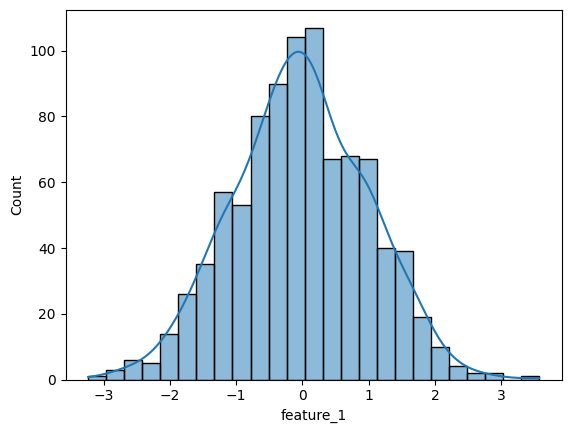

In [23]:
sns.histplot(class_0['feature_1'], kde=True)

<Axes: xlabel='feature_2', ylabel='Count'>

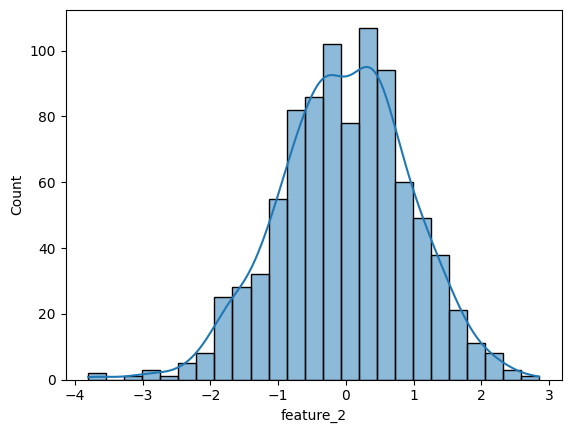

In [24]:
sns.histplot(class_0['feature_2'], kde=True)

<Axes: xlabel='feature_1', ylabel='Count'>

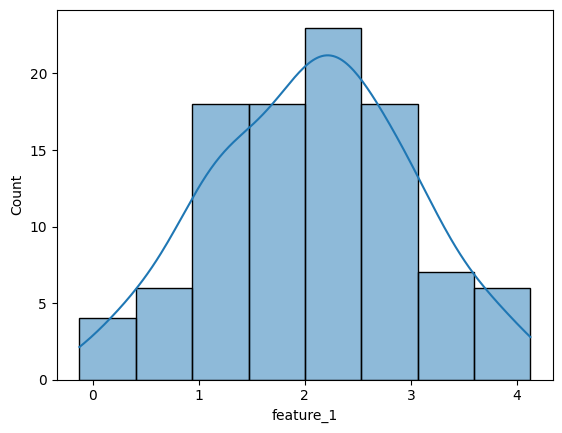

In [25]:
sns.histplot(class_1['feature_1'], kde=True)

<Axes: xlabel='feature_2', ylabel='Count'>

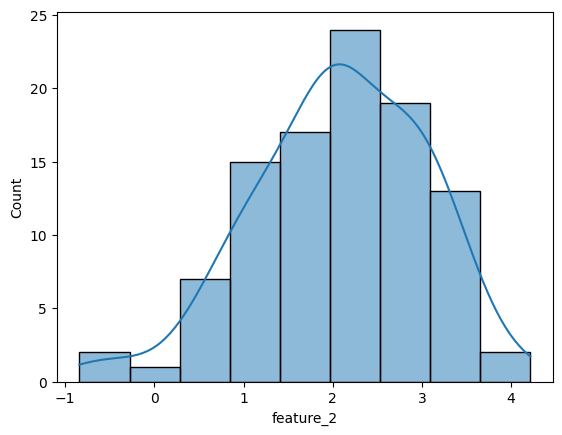

In [26]:
sns.histplot(class_1['feature_2'], kde=True)

### Up Sampling OR Over Sampling

\# Why replace=True?
- Since the minority class has fewer samples, we must allow repetition to artificially increase its count.
- Without replacement (replace=False), we wouldn't be able to generate more samples than we originally had.

In [30]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [31]:
from sklearn.utils import resample

In [33]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [34]:
df_minority_upsampled

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


In [35]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [36]:
df_upsampled

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


In [37]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

### Down Sampling  OR Over Sampling

It is bad because in this we are loosing the data points 

\# Why replace = False?

- Since we are removing data, we don’t need to duplicate anything.
- Sampling without replacement ensures that we get a subset of the existing data.

In [38]:
### Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_sample = 1000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0

## Create a data set with imbalanced data set

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [39]:
## down sampling
df_majority = df[df['target'] == 0]
df_minority = df[df['target'] == 1]

In [42]:
df_majority.shape, df_minority.shape

((900, 3), (100, 3))

In [43]:
df_majority_downsampled = resample(df_majority, n_samples=len(df_minority), random_state=42)

In [44]:
df_majority_downsampled

,feature_1,feature_2,target
102,0.712265,0.718151,0
435,1.199988,0.574621,0
860,0.304515,-0.759475,0
270,-1.213385,0.675504,0
106,0.179549,-0.202659,0
...,...,...,...
201,-0.598105,1.575650,0
269,0.420180,0.570631,0
862,-0.392309,0.446491,0
815,-0.148405,-0.457929,0


In [45]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [46]:
df_downsampled

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1
...,...,...,...
201,-0.598105,1.575650,0
269,0.420180,0.570631,0
862,-0.392309,0.446491,0
815,-0.148405,-0.457929,0


In [47]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64